# Import Libraries

In [630]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

# Import Data

In [571]:
loan_data_backup = pd.read_csv('./data/credit_train.csv')
loan_data = loan_data_backup.copy()

In [572]:
# Forces pandas to show all columns
pd.options.display.max_columns=None

In [573]:
loan_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [574]:
loan_data.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [575]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

# General Preprocessing

In [576]:
# From row index 100,000 to the end, all rows and columns are just NaNs
# Let's get rid of these
null_indx = [i for i in range(100000, len(loan_data))]
loan_data.drop(index=null_indx, inplace=True)

## Preprocessing Few Continuous Variables

In [577]:
loan_data['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [578]:
# Clean data type and convert to int
loan_data['Years in current job'].fillna(value=str(0), inplace=True)
loan_data['emp_length_int'] = loan_data['Years in current job'].str.replace('\+ years', '')

emp_length_dict = {
    '< 1 year': str(0),
    ' years': '',
    ' year': ''
}

for key in emp_length_dict.keys():
    loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(key, emp_length_dict[key])

# For NaNs, impute 0 for no employee length
loan_data['emp_length_int'].fillna(value=str(0), inplace=True)

In [579]:
# Convert data types
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [580]:
loan_data['emp_length_int'].isna().sum()

0

In [581]:
loan_data['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [582]:
loan_data['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [583]:
# Encode the Term column
loan_data['is_short_term'] = np.where(loan_data['Term'] == 'Short Term', 1, 0)

In [584]:
loan_data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'emp_length_int',
       'is_short_term'],
      dtype='object')

In [585]:
loan_data['Years of Credit History'].describe()

count    100000.000000
mean         18.199141
std           7.015324
min           3.600000
25%          13.500000
50%          16.900000
75%          21.700000
max          70.500000
Name: Years of Credit History, dtype: float64

In [586]:
# Convert years of credit history to months
loan_data['mths_since_earliest_cr_line'] = loan_data['Years of Credit History'] * 12
loan_data['mths_since_earliest_cr_line'].describe()

count    100000.000000
mean        218.389692
std          84.183884
min          43.200000
25%         162.000000
50%         202.800000
75%         260.400000
max         846.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [587]:
loan_data['mths_since_earliest_cr_line'].isna().sum()

0

In [588]:
# Credit Score
loan_data['Credit Score'].describe()

count    80846.000000
mean      1076.456089
std       1475.403791
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [589]:
# Max credit score of 7510? Let's look deeper
loan_data['Credit Score'][loan_data['Credit Score'] > 850]

5        7290.0
43       7120.0
51       6610.0
56       7380.0
65       7370.0
          ...  
99851    7420.0
99872    7070.0
99906    6880.0
99944    6790.0
99947    6940.0
Name: Credit Score, Length: 4551, dtype: float64

In [590]:
# If you remove the trailing 0, the scores would look reasonable
for i in range(len(loan_data['Credit Score'])):
    if loan_data['Credit Score'][i] > 850:
        loan_data['Credit Score'][i] = loan_data['Credit Score'][i] / 10

loan_data['Credit Score'].describe()

<ipython-input-590-f3ef90d4ab61>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

Makes more sense this way

In [591]:
loan_data[['Credit Score', 'Loan Status', 'Annual Income']].isna()[loan_data['Credit Score'].isna() == True]

,Credit Score,Loan Status,Annual Income
1,True,False,True
4,True,False,True
7,True,False,True
11,True,False,True
15,True,False,True
...,...,...,...
99978,True,False,True
99982,True,False,True
99988,True,False,True
99989,True,False,True


Credit Score and Annual Income have the exact same number of null values. When there's a null in the credit score, there's a null in the annual income. 

This means these borrowers either have no credit/income or there's an error in the data.

We should impute the NaNs as the min of their respective columns. The logic being that these borrowers either have no credit score or no annual income or both. Imputing the min makes sense to keep the distribution similar.

In [592]:
loan_data['Credit Score'].fillna(loan_data['Credit Score'].min(), inplace=True)

In [593]:
# Annual Income
loan_data['Annual Income'].describe()

count    8.084600e+04
mean     1.378277e+06
std      1.081360e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174162e+06
75%      1.650663e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [594]:
fig = px.histogram(loan_data, x='Annual Income')
fig.show()

Vast majority of people make between 50k-100k.

The large data points are realistic.

Let's keep these in the data and impute the median income for NaNs. We are using Median because the Mean may be skewed by extremely wealthy people

In [595]:
loan_data['Annual Income'].fillna(loan_data['Annual Income'].median(), inplace=True)

In [596]:
loan_data['Annual Income'].isna().sum()

0

In [597]:
loan_data['Months since last delinquent'].describe()

count    46859.000000
mean        34.901321
std         21.997829
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

In [598]:
# Months since last delinquent

# Impute mean for null values
loan_data['Months since last delinquent'].fillna(value=loan_data['Months since last delinquent'].mean(), inplace=True)

In [599]:
# Maximum open credit
loan_data['Maximum Open Credit'].describe()

count    9.999800e+04
mean     7.607984e+05
std      8.384503e+06
min      0.000000e+00
25%      2.734380e+05
50%      4.678740e+05
75%      7.829580e+05
max      1.539738e+09
Name: Maximum Open Credit, dtype: float64

In [600]:
# Impute mean for Null values
loan_data['Maximum Open Credit'].fillna(value=loan_data['Maximum Open Credit'].mean(), inplace=True)

In [601]:
# Bankruptcies
loan_data['Bankruptcies'].describe()

count    99796.000000
mean         0.117740
std          0.351424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: Bankruptcies, dtype: float64

In [602]:
# Impute mean for null values
loan_data['Bankruptcies'].fillna(value=loan_data['Bankruptcies'].min(), inplace=True)

In [603]:
loan_data['Bankruptcies'].describe()

count    100000.000000
mean          0.117500
std           0.351105
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64

In [604]:
# Tax Liens
loan_data['Tax Liens'].fillna(value=loan_data['Tax Liens'].min(), inplace=True)

## Preprocessing Few Discrete Variables

Discrete columns:
1. Loan Status
2. Home Ownership
3. Purpose

In [605]:
# Loan Status
loan_data['Loan Status'].isna().sum()

0

In [606]:
loan_data['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [607]:
# Home Ownership
loan_data['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [608]:
# Let's replace HaveMortgage with Home Mortgage
for i in range(len(loan_data)):
    if loan_data['Home Ownership'][i] == 'HaveMortgage':
        loan_data['Home Ownership'][i] = 'Home Mortgage'

loan_data['Home Ownership'].value_counts()

<ipython-input-608-5f31b0f6483e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Home Mortgage    48624
Rent             42194
Own Home          9182
Name: Home Ownership, dtype: int64

In [609]:
# Purpose
loan_data['Purpose'] = loan_data['Purpose'].str.replace('other', 'Other')

In [610]:
# Create dummies, dropping the first
# Concat with loan_data dataframe

loan_data_dummies = [
    pd.get_dummies(loan_data['Loan Status'], prefix='loan_status', prefix_sep=':', drop_first=False),
    pd.get_dummies(loan_data['Home Ownership'], prefix='home_ownership', prefix_sep=':', drop_first=False),
    pd.get_dummies(loan_data['Purpose'], prefix='purpose', prefix_sep=':', drop_first=False)
    ]

loan_data_dummies = pd.concat(loan_data_dummies, axis = 1 )

type(loan_data_dummies)

pandas.core.frame.DataFrame

In [611]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)
loan_data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'emp_length_int',
       'is_short_term', 'mths_since_earliest_cr_line',
       'loan_status:Charged Off', 'loan_status:Fully Paid',
       'home_ownership:Home Mortgage', 'home_ownership:Own Home',
       'home_ownership:Rent', 'purpose:Business Loan', 'purpose:Buy House',
       'purpose:Buy a Car', 'purpose:Debt Consolidation',
       'purpose:Educational Expenses', 'purpose:Home Improvements',
       'purpose:Medical Bills', 'purpose:Other', 'purpose:Take a Trip',
       'purpose:major_purchase', 'purpose:moving', 'purpose:renewable_energy',
       'purpose:small_business', 'purpo

# PD Model

## Data Preparation

### Dependent Variable. Good/Bad (default) definition. Default and Non-default Accounts

In [612]:
loan_data['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [613]:
loan_data['Loan Status'].value_counts() / loan_data['Loan Status'].count()

Fully Paid     0.77361
Charged Off    0.22639
Name: Loan Status, dtype: float64

In [614]:
loan_data['good_bad'] = np.where(loan_data["Loan Status"].isin(['Charged Off']), 0, 1)

In [615]:
loan_data[['Loan Status', 'good_bad']]

,Loan Status,good_bad
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Fully Paid,1
...,...,...
99995,Fully Paid,1
99996,Fully Paid,1
99997,Fully Paid,1
99998,Fully Paid,1


### Splitting the Data

In [617]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42)

In [618]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(80000, 42)
(80000,)
(20000, 42)
(20000,)


# Preprocess Discrete Variables

1. Term
2. Home Ownership
3. Purpose

In [619]:
# Define train variables
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [565]:
# Find WOE and Information Value for each Term category
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    '''
    Calculates the WoE and Information Value
    '''
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)

    count_df = df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count()
    mean_df = df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
    df = pd.concat([count_df, mean_df], axis=1)

    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']

    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()

    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']

    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()

    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])

    df.sort_values('WoE', inplace=True)
    df.reset_index(drop=True)

    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()

    df['IV'] = sum((df['prop_n_good'] - df['prop_n_bad']) * df['WoE'])

    return df

In [627]:
df_term = woe_discrete(df_inputs_prepr, 'Term', df_targets_prepr)
df_home_own = woe_discrete(df_inputs_prepr, 'Home Ownership', df_targets_prepr)
df_purpose = woe_discrete(df_inputs_prepr, 'Purpose', df_targets_prepr)

## Visualizing the Results

In [635]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    X = np.array(df_WoE.iloc[:, 0].apply(str))
    Y = df_WoE['WoE']

    plt.figure(figsize = (18, 6))
    plt.plot(X, Y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

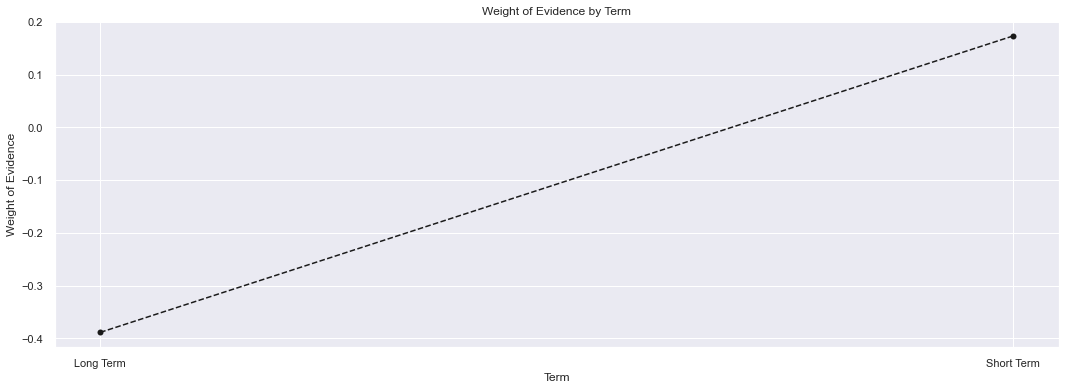

In [636]:
plot_by_woe(df_term)

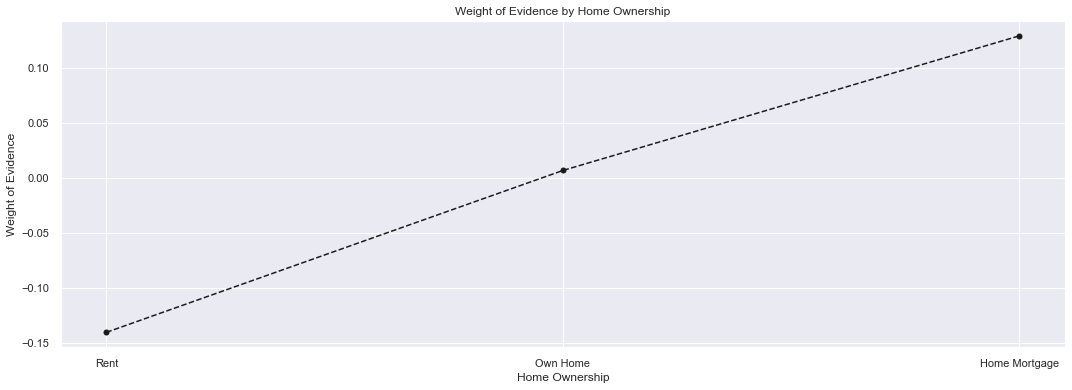

In [637]:
plot_by_woe(df_home_own)

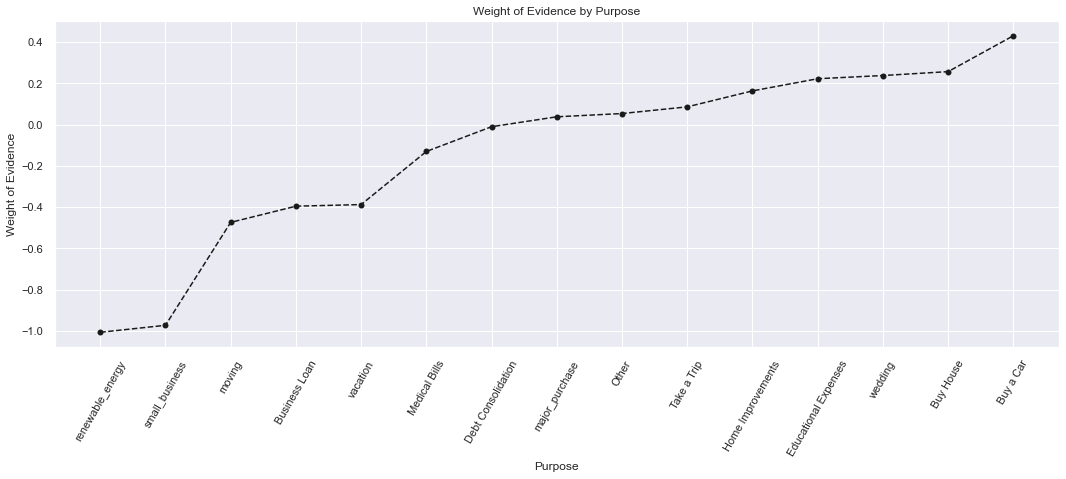

In [641]:
plot_by_woe(df_purpose, rotation_of_x_axis_labels=60)